In [21]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

import numpy as np

array([[ 0.  , -0.23],
       [ 0.83,  0.23]])

In [49]:

def data_fixed_cov():
    n,dim = 300,2
    np.random.seed(0)
    C = np.array([[0,-0.23],[0.83,0.23]])
    print(C)
    x = np.r_[
           np.dot(np.random.rand(n,dim),C),
           np.dot(np.random.rand(n,dim),C)+np.array([1,2])
    ]
    y = np.hstack((np.zeros(n),np.ones(n)))
    return x,y


def data_differ_cov():
    n,dim = 300,2
    np.random.seed(0)
    C = np.array([[0,-0.23],[0.83,0.23]])
    x = np.r_[
           np.dot(np.random.rand(n,dim),C),
           np.dot(np.random.rand(n,dim),C.T)+np.array([1,4])
    ]

    y = np.hstack((np.zeros(n),np.ones(n)))
    return x,y


#这个矩阵是干什么用的呢？？？

In [50]:
data_differ_cov()

(array([[ 0.59360717,  0.03826645],
        [ 0.45225304, -0.01331244],
        [ 0.53609211,  0.05111504],
        ...,
        [ 0.87109636,  4.44421558],
        [ 0.93405516,  4.62056597],
        [ 0.90817885,  4.107975  ]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0

In [51]:
#结果总共有四类
def plot_data(clf,x,y,y_pred,fig_index =1):
    splot = plt.subplot(2,2,fig_index)
    if fig_index==1:
        plt.title("LDA")
        plt.ylabel('Data with fixed convariance')
    elif fig_index==2:
        plt.title("QDA")
    elif fig_index==3:
        plt.ylabel("Data with varying covariances")

    tp= y==y_pred    #正确的数组
    tp0 ,tp1= tp[y==0],tp[y==1]
    x0,x1 = x[y==0],x[y==1]

    x0_tp,x0_fp = x0[tp0],x0[~tp0]
    x1_tp,x1_fp = x1[tp1],x1[~tp1]




    plt.scatter( x0_tp[:,0],x0_tp[:,1],marker='.')
    plt.scatter(x0_fp[:,0],x0_fp[:,1],marker='x')


    plt.scatter( x1_tp[:,0],x1_tp[:,1],marker='.')
    plt.scatter(x1_fp[:,0],x1_fp[:,1],marker='x')

[[ 0.   -0.23]
 [ 0.83  0.23]]


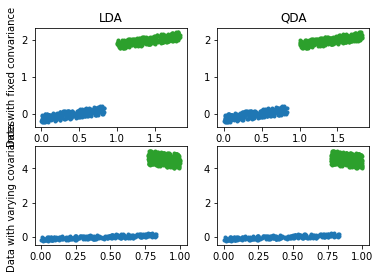

In [52]:
for i ,(x,y) in enumerate([data_fixed_cov(),data_differ_cov()]):
    lda = LinearDiscriminantAnalysis(store_covariance=True)
    y_pred= lda.fit(x,y).predict(x)
    splot = plot_data(lda,x,y,y_pred,fig_index =2*i+1)

    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(x,y).predict(x)
    splot = plot_data(lda,x,y,y_pred,fig_index =2*i+2)

#没有搞清楚这个lda的